# Google playstore data

### Complete Eda analysis for Beginners to Advance EDA


# About Dataset

### Description

the data set was download from kaggle from the follwing(https://www.kaggle.com/datasets/lava18/google-play-store-apps)

#### Context

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

#### Content

Each app (row) has values for catergory, rating, size, and more.

#### Acknowledgements

This information is scraped from the Google Play Store. This app information would not be available without it.

#### Inspiration

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!


# 1. Importing Librarries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# 2. Data Loading and Exploration | Cleaning

- Let's load csv file

In [2]:
df = pd.read_csv('./data/googleplaystore.csv')

- Let's have a look on top 5 rows of the data 

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Important Thisngs to Know

In [4]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings 
import warnings
warnings.filterwarnings('ignore')


In [5]:
print(f"The names of column in this dataset as follows :{df.columns}")

The names of column in this dataset as follows :Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [6]:
print(f"The number of Rows are {df.shape[0]}, and columns are{df.shape[1]}.")   # no of rows and columns 

The number of Rows are 10841, and columns are13.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [9]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# how to make size a numeric columns

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---

### Observations:
1. "Veries with device"
2. M
3. K 
---

In [11]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
df['Size'].isnull().sum()

0

- No missing values in size, we are good to move

Verfy the number of values and 3 diffrent kinds of values

In [13]:
# find the values having M in them 
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [14]:
# find values having K in them 
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()


316

In [15]:
# find values having Veries with device in them 
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [16]:
len(df)

10841

In [17]:
8829+316+1695

10840

In [18]:
# Convert the whole size column into bytes

# let's   define a function 

def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k',"")) * 1024
        elif 'M' in size:
            return float(size.replace('M', "")) * 1024 *1024
        elif 'Varies with device' in size:
            return np.nan
    return size    

In [19]:
# let's apply this functions 
df['Size'] =df['Size'].apply(convert_size)

In [20]:
df['Size'].head(20)

0     19922944.0
1     14680064.0
2      9122611.2
3     26214400.0
4      2936012.8
5      5872025.6
6     19922944.0
7     30408704.0
8     34603008.0
9      3250585.6
10    29360128.0
11    12582912.0
12    20971520.0
13    22020096.0
14    38797312.0
15     2831155.2
16     5767168.0
17    17825792.0
18    40894464.0
19    32505856.0
Name: Size, dtype: object

In [21]:
# rename the columns 
df.rename(columns={'Size': "Size_in_bytes"}, inplace=True)

In [22]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')

In [24]:
# df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x / (1024 * 1024) if pd.notnull(x) else np.nan)
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x / (1024 * 1024))

In [25]:
df['Size_in_kb'] = df['Size_in_bytes'].apply(lambda x: x / (1024))

In [26]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


# Let's take care of installs 

In [27]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [28]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [29]:
df['Installs'].isnull().sum()

0

## installs column

1.  Removed + sign
2.  remove ,
3.  convert the column into the integer 

In [30]:
# df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x)

In [31]:
# df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)

In [32]:
def clean_and_convert(installs):
    if isinstance(installs, str):
        # Remove non-numeric characters
        installs = installs.replace('+', '').replace(',', '')
        # Convert to integer if possible
        try:
            return int(installs)
        except ValueError:
            # Handle non-numeric cases (e.g., 'Free')
            return 0  # or use pd.NA for missing values
    return installs

# Apply the function to the 'Installs' column
df['Installs'] = df['Installs'].apply(clean_and_convert)

In [33]:
df['Installs'] = df['Installs'].apply(clean_and_convert)

In [34]:
df['Installs'] =df['Installs'].apply(lambda x: int(x))

- conver Reviews in datatype in numric

In [35]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Check data type
print(df['Reviews'].dtype)  # Should be float64

float64


In [36]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: count, dtype: int64

In [37]:

df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mb,Size_in_kb
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000,102400.000000


# Price column

In [38]:
df['Price'].value_counts()

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$19.40          1
$3.90           1
$1.96           1
$4.60           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$3.28           1
$4.80           1
$4.59           1
$3.08           1
$28.99          1
$2.95           1
$2.90           1
$1.97           1
$200

In [39]:
# let see how many values have $ sign 
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [40]:
df['Price'].loc[(df['Price'].str.contains('0')) & ( ~df['Price'].str.contains('\$'))].value_counts().sum()

10040

In [41]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

In [42]:
df['Price'].value_counts()

Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
29.99           7
24.99           7
3.49            7
7.99            7
5.49            6
19.99           6
11.99           5
6.49            5
12.99           5
8.99            5
10.00           3
16.99           3
1.00            3
2.00            3
13.99           2
8.49            2
17.99           2
1.70            2
3.95            2
79.99           2
7.49            2
9.00            2
10.99           2
39.99           2
33.99           2
19.40           1
3.90            1
1.96            1
4.60            1
15.46           1
3.04            1
4.29            1
2.60            1
3.28            1
4.80            1
4.59            1
3.08            1
28.99           1
2.95            1
2.90            1
1.97            1
200.

In [43]:
# now we can convert this into a numric values 
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Optional: Check for non-numeric entries
non_numeric_entries = df.loc[df['Price'].isna()]

In [44]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_kb
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10840.000000,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,1.027368,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,15.949703,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


In [45]:
# using f string price min max and average of the app
print(f"Min price is {df['Price'].min()}")
print(f"Max price is {df['Price'].max()}")
print(f"Mean price is {df['Price'].mean()}")

Min price is 0.0
Max price is 400.0
Mean price is 1.027368081180812


# Missing values inside the data

In [46]:
# find missing values 
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1696
Size_in_Mb        1696
Size_in_kb        1696
Rating            1474
Current Ver          8
Android Ver          3
Reviews              1
Type                 1
Price                1
Content Rating       1
App                  0
Category             0
Installs             0
Genres               0
Last Updated         0
dtype: int64

In [47]:
# find missing values persentage in the data round of 2 
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)



Size_in_bytes     15.64
Size_in_Mb        15.64
Size_in_kb        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.03
Reviews            0.01
Type               0.01
Price              0.01
Content Rating     0.01
App                0.00
Category           0.00
Installs           0.00
Genres             0.00
Last Updated       0.00
dtype: float64

In [48]:
# find total number of missing values
df.isnull().sum().sum()

6577

<Axes: >

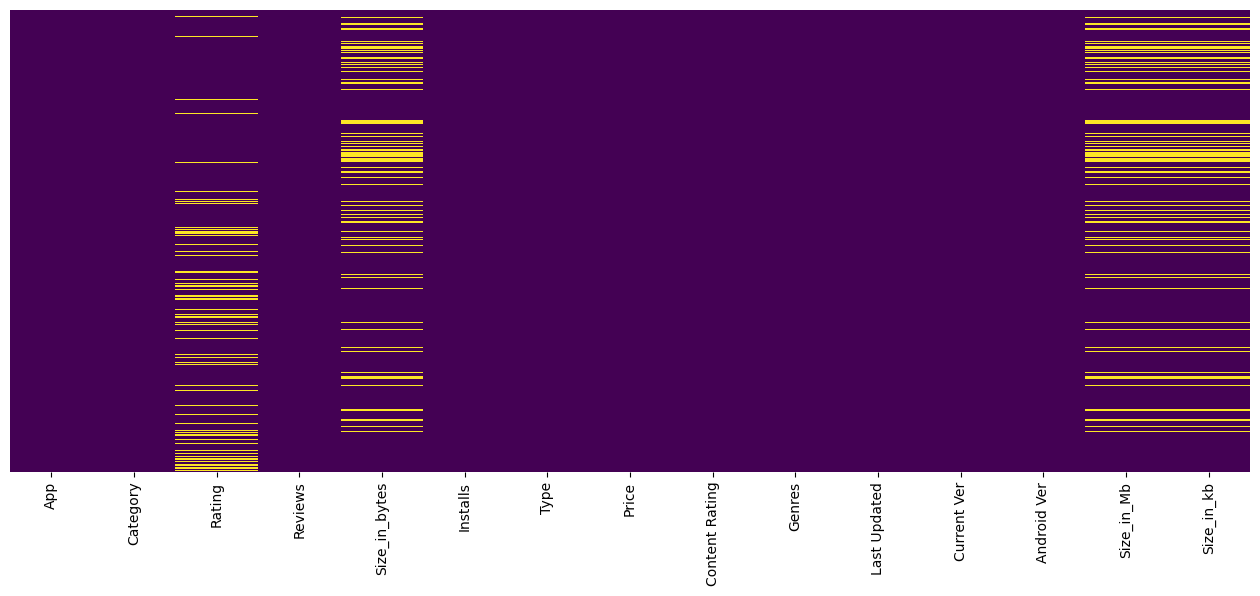

In [49]:
# plot missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Missing values by column')

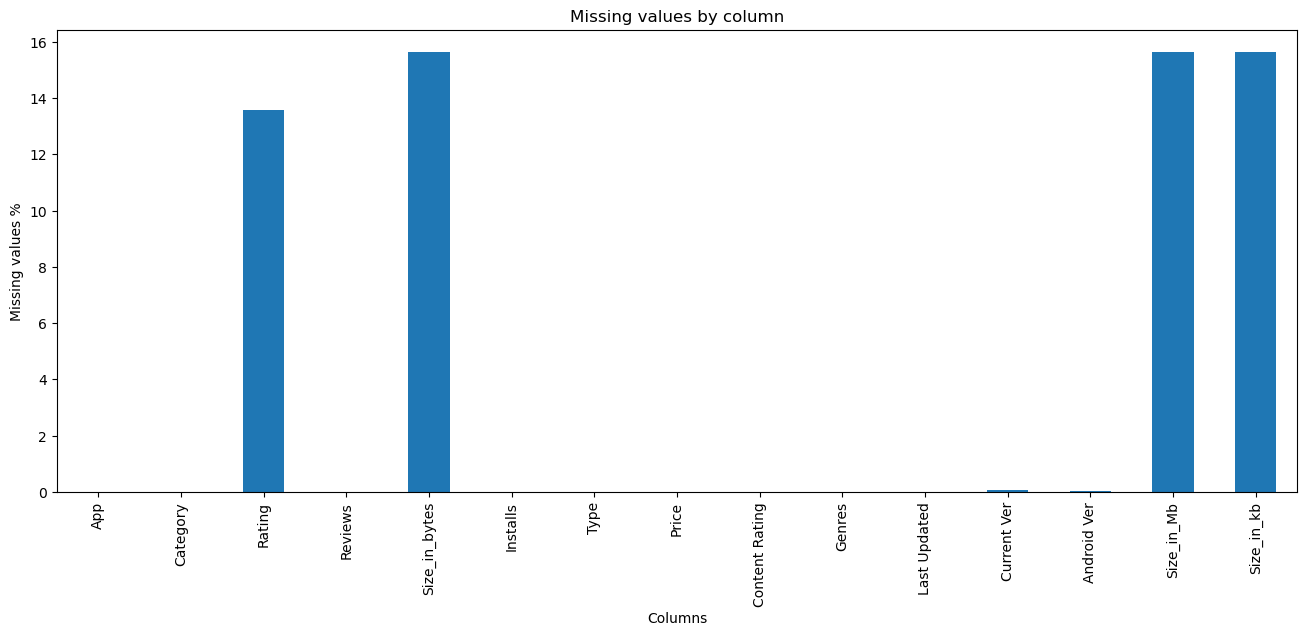

In [50]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by theri precentage in each column
missing_persentage = df.isnull().sum() / len(df) * 100
missing_persentage.plot(kind='bar')
# add labels 
plt.xlabel('Columns')
plt.ylabel('Missing values %')
plt.title('Missing values by column')



<Axes: >

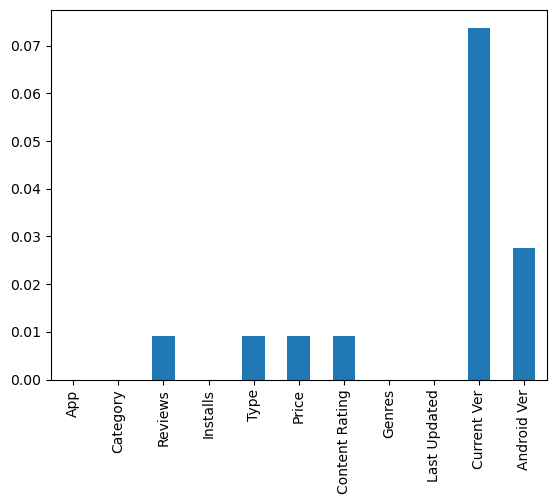

In [51]:
missing_persentage[missing_persentage <1].plot(kind='bar')